# Flotation Process Data Exploration

This notebook provides a comprehensive exploration of the flotation process dataset, focusing on how operational parameters affect silica concentration.

## 1. Import Required Libraries

We will use pandas and numpy for data manipulation, and matplotlib.pyplot and seaborn for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

## 2. Load the Dataset

Load the dataset into a pandas DataFrame. Confirm all columns are float64 and check the shape.

In [2]:
abs_path = '/home/ubuntu/dvc/dvc_exam/examen-dvc'

df = pd.read_csv(abs_path+"/data/raw_data/raw.csv", sep=",")

# Confirm all columns are float64 and check shape
print("Shape:", df.shape)
print("Data types:\n", df.dtypes)

Shape: (1817, 10)
Data types:
 date                   object
ave_flot_air_flow     float64
ave_flot_level        float64
iron_feed             float64
starch_flow           float64
amina_flow            float64
ore_pulp_flow         float64
ore_pulp_pH           float64
ore_pulp_density      float64
silica_concentrate    float64
dtype: object


## 3. Display Basic Information

Display the first few rows, column names, data types, and check for duplicates or missing values.

In [3]:
# Display first 5 rows
display(df.head())

# Show column names and data types
print("Columns:", df.columns.tolist())
print("Data types:\n", df.dtypes)

# Check for duplicates and missing values
print("Number of duplicate rows:", df.duplicated().sum())
print("Missing values per column:\n", df.isnull().sum())

date  ave_flot_air_flow  ave_flot_level  iron_feed  \
0  2017-04-24 00:00:00         300.263166      383.982443      55.17   
1  2017-04-24 01:00:00         299.782402      386.049069      55.17   
2  2017-04-24 02:00:00         299.750052      385.250935      55.17   
3  2017-04-24 03:00:00         299.997522      389.635519      55.17   
4  2017-04-24 04:00:00         300.005220      387.810807      55.17   

   starch_flow  amina_flow  ore_pulp_flow  ore_pulp_pH  ore_pulp_density  \
0  1979.589150  599.676489     400.017222     9.774028          1.753206   
1  1758.466329  600.043100     400.484528     9.539246          1.754190   
2  2379.752428  599.948406     400.325617     9.434227          1.756873   
3  2287.130046  599.580383     399.801506     9.725607          1.727125   
4  2291.789167  599.871217     399.567333     9.845198          1.633063   

   silica_concentrate  
0            4.360000  
1            3.290000  
2            4.900000  
3            4.860153  
4            4.780898

Columns: ['date', 'ave_flot_air_flow', 'ave_flot_level', 'iron_feed', 'starch_flow', 'amina_flow', 'ore_pulp_flow', 'ore_pulp_pH', 'ore_pulp_density', 'silica_concentrate']
Data types:
 date                   object
ave_flot_air_flow     float64
ave_flot_level        float64
iron_feed             float64
starch_flow           float64
amina_flow            float64
ore_pulp_flow         float64
ore_pulp_pH           float64
ore_pulp_density      float64
silica_concentrate    float64
dtype: object
Number of duplicate rows: 0
Missing values per column:
 date                  0
ave_flot_air_flow     0
ave_flot_level        0
iron_feed             0
starch_flow           0
amina_flow            0
ore_pulp_flow         0
ore_pulp_pH           0
ore_pulp_density      0
silica_concentrate    0
dtype: int64


## 4. Summary Statistics

Show summary statistics for all features.

In [4]:
df.describe().T

count         mean         std         min          25%  \
ave_flot_air_flow   1817.0   296.036027    6.342455  282.466012   291.643054   
ave_flot_level      1817.0   457.718993   66.963782  306.748910   408.780472   
iron_feed           1817.0    57.594662    5.753694   43.370000    52.670000   
starch_flow         1817.0  3106.797900  831.195329  401.628723  2554.580328   
amina_flow          1817.0   502.075958   65.957732  301.264021   454.769861   
ore_pulp_flow       1817.0   400.015391    0.865649  396.331445   399.508139   
ore_pulp_pH         1817.0     9.895610    0.298358    8.809455     9.705173   
ore_pulp_density    1817.0     1.681849    0.049554    1.546127     1.653314   
silica_concentrate  1817.0     2.161673    1.047229    0.850000     1.370000   

                            50%          75%          max  
ave_flot_air_flow    299.859804   299.961731   301.338649  
ave_flot_level       421.505544   500.251061   767.639752  
iron_feed             57.380000    64.030000    65.780000  
starch_flow         3144.695311  3648.292550  5556.094067  
amina_flow           509.368744   553.007194   715.748025  
ore_pulp_flow        399.976989   400.482357   403.177721  
ore_pulp_pH            9.914017    10.103874    10.758195  
ore_pulp_density       1.690384     1.716987     1.797635  
silica_concentrate     1.820000     2.670000     5.330000

## 5. Pairplot of All Features

Visualize pairwise relationships between all variables using seaborn's pairplot.

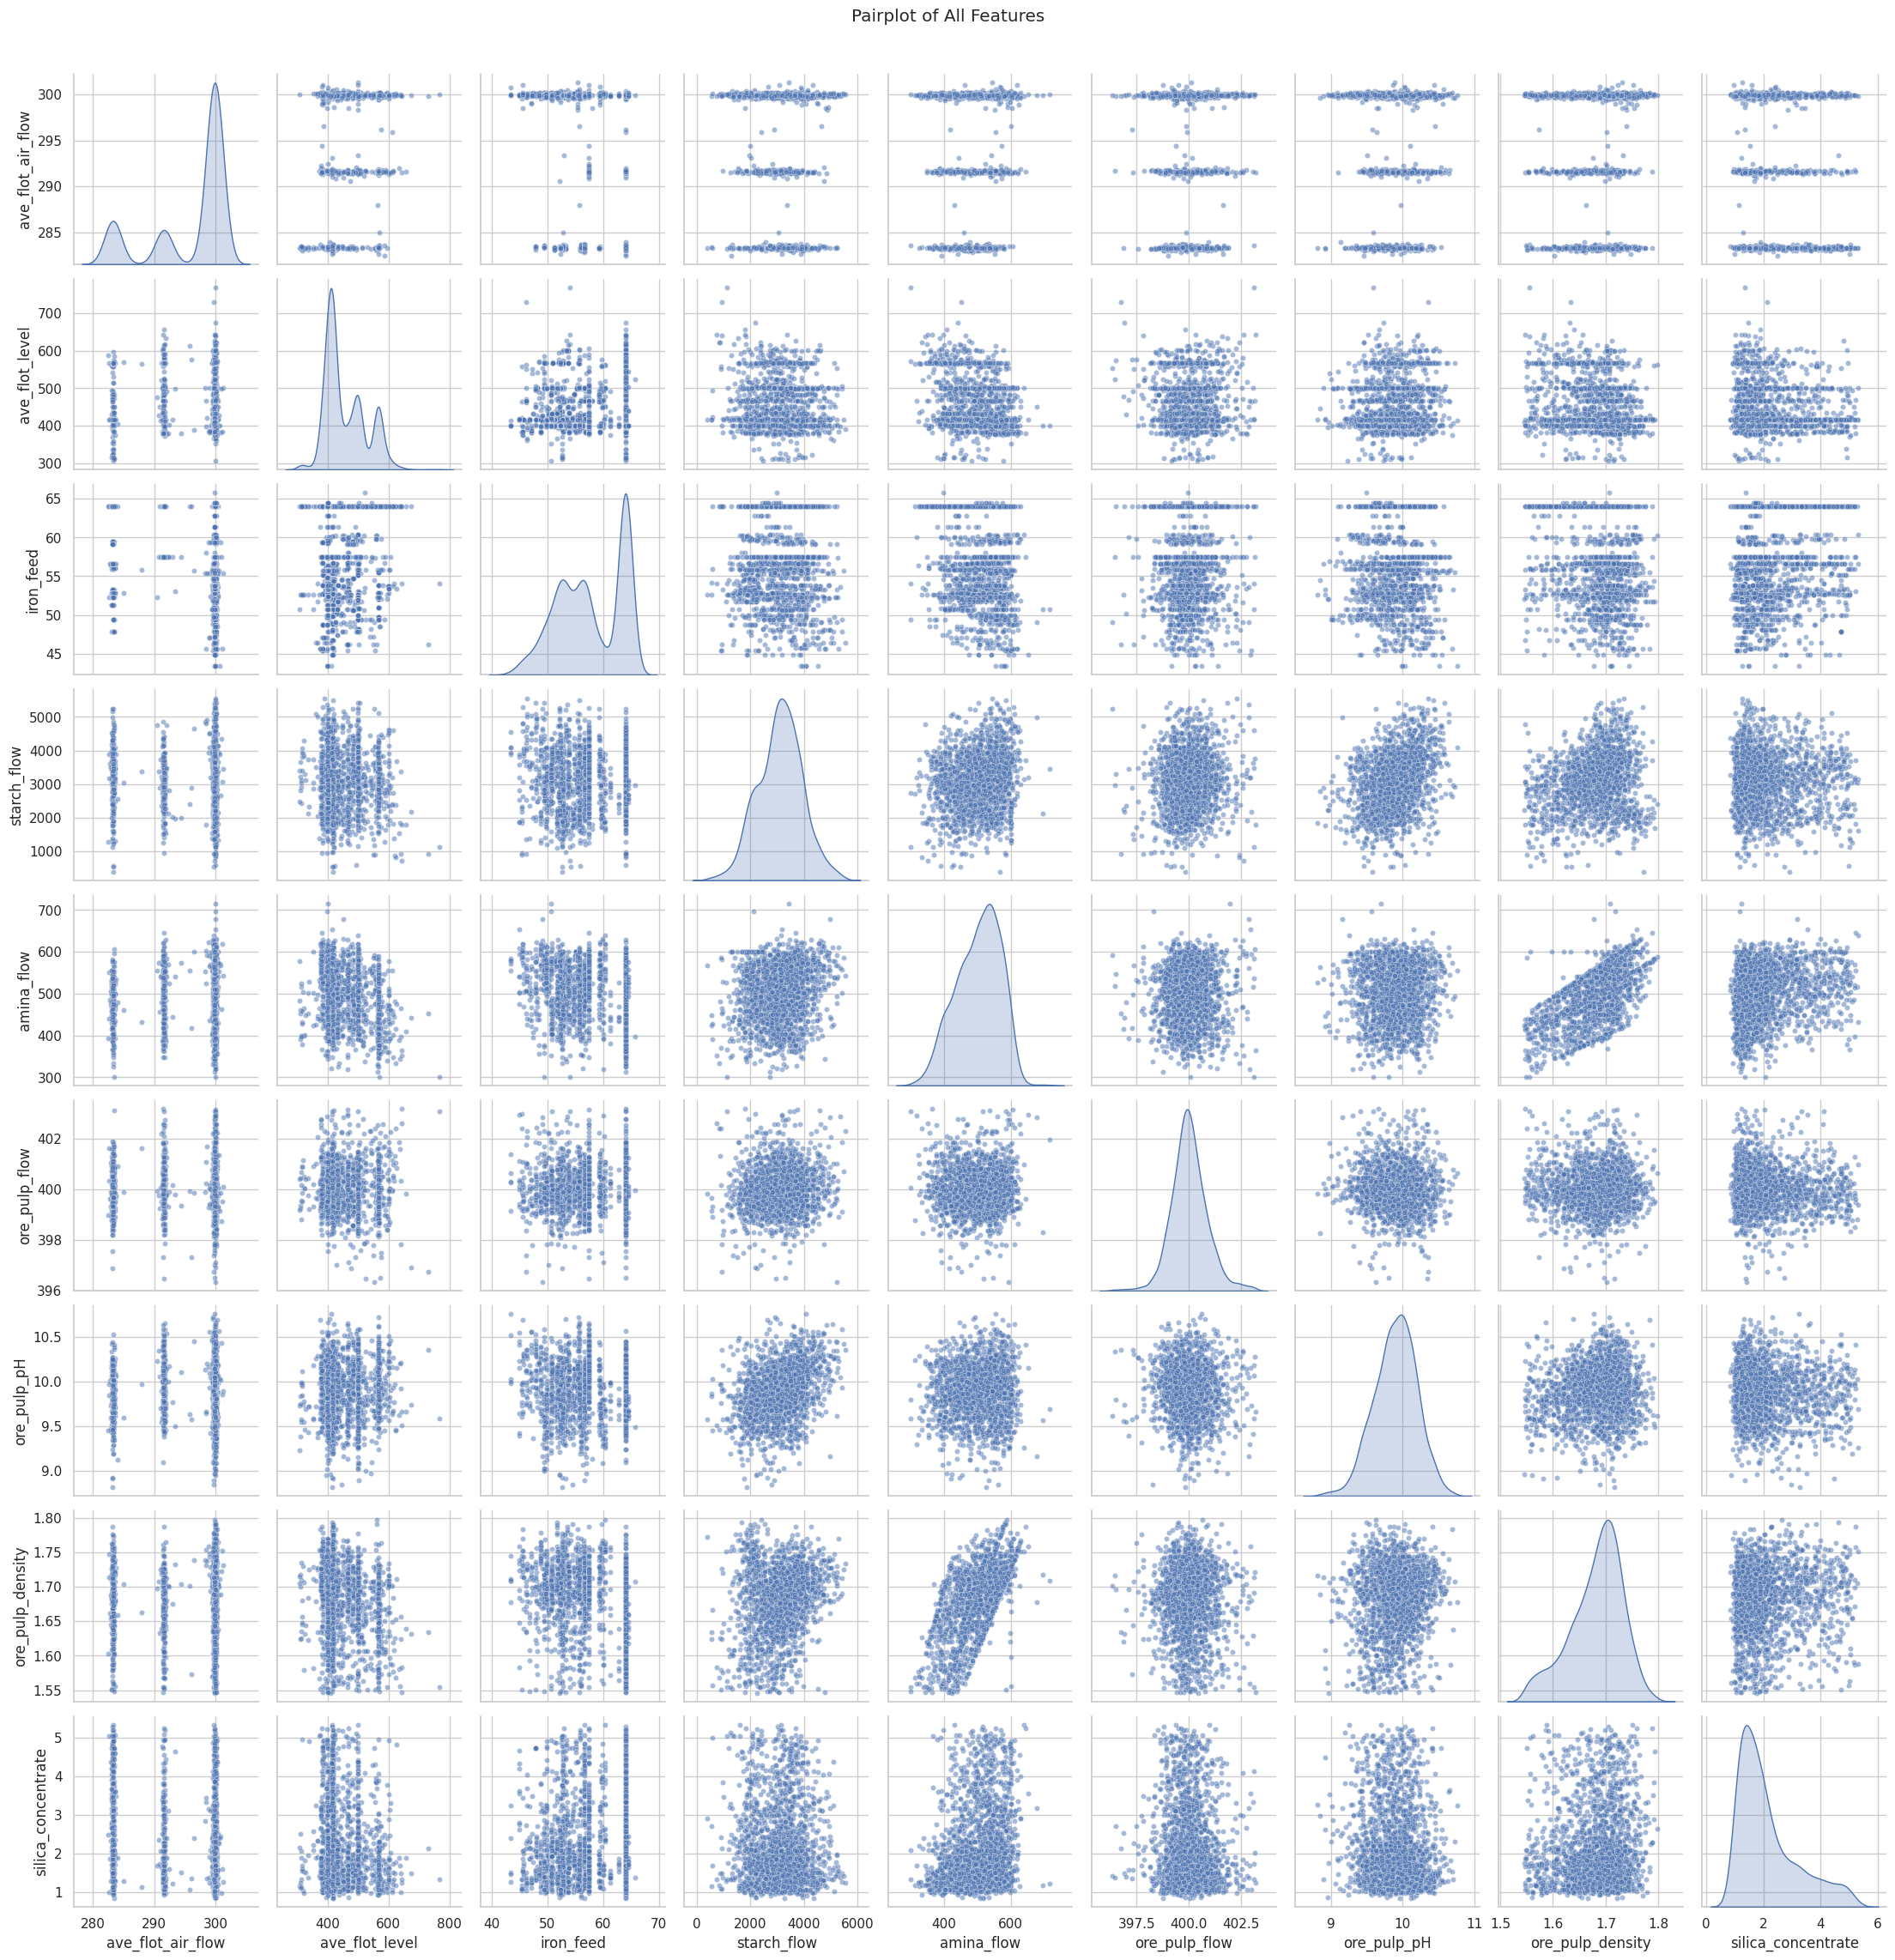

In [5]:
# Due to the number of features, pairplot may take some time
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5, 's':20})
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()

## 6. Correlation Matrix and Heatmap

Compute the correlation matrix and plot it using seaborn's heatmap to visualize feature correlations.

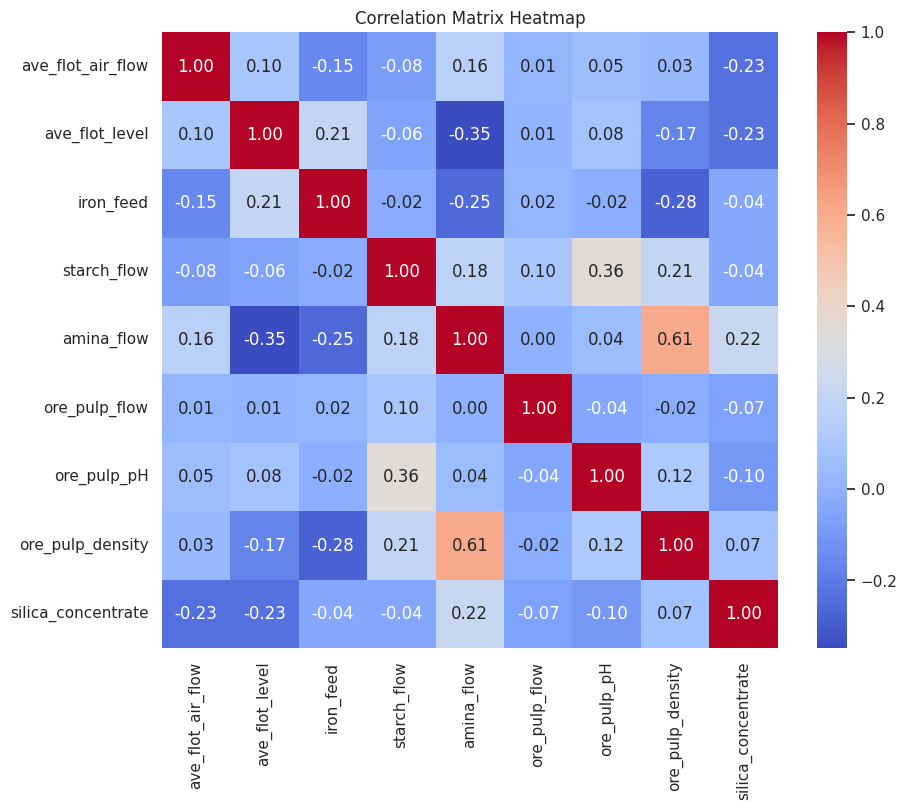

In [6]:

numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 7. Distribution Plots for Each Feature

Plot the distribution (histogram and KDE) for each feature to understand their distributions.

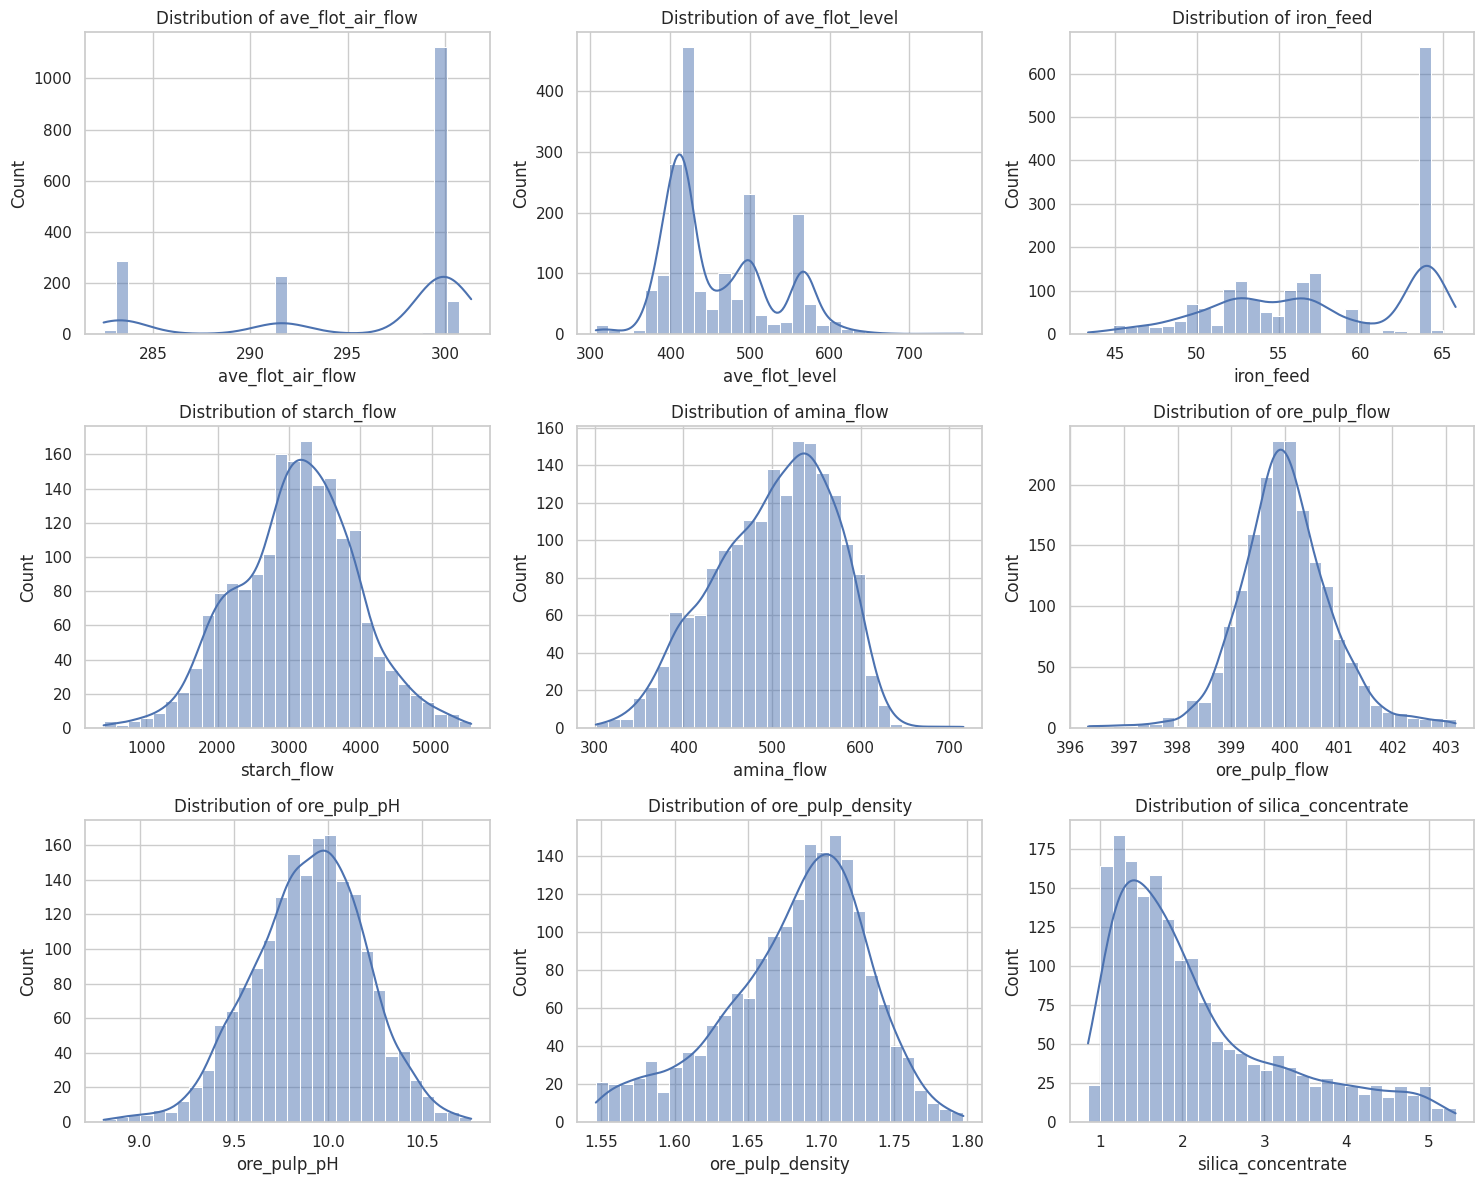

In [7]:
features = numeric_df.columns.tolist()
n_features = len(features)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## 8. Boxplots for Outlier Detection

Create boxplots for each feature to detect potential outliers.

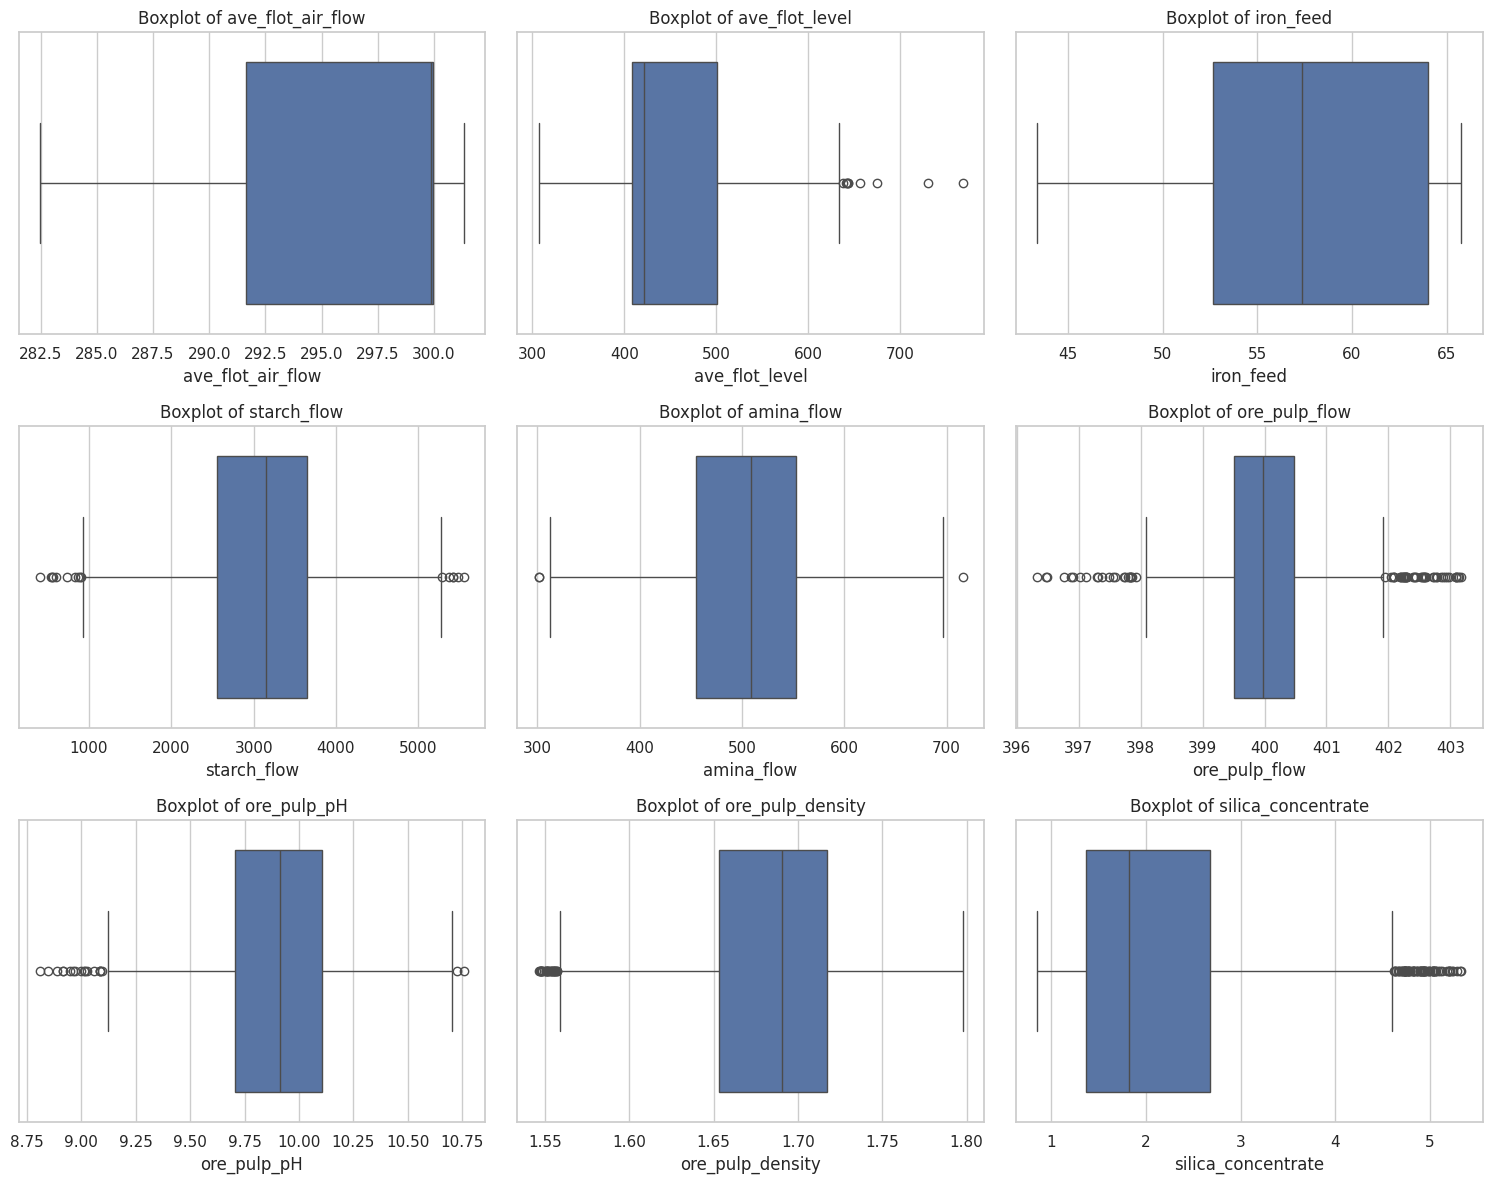

In [8]:
plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## 9. Scatter Plots vs. Target (silica_concentrate)

Plot scatter plots of each feature against silica_concentrate to visualize relationships.

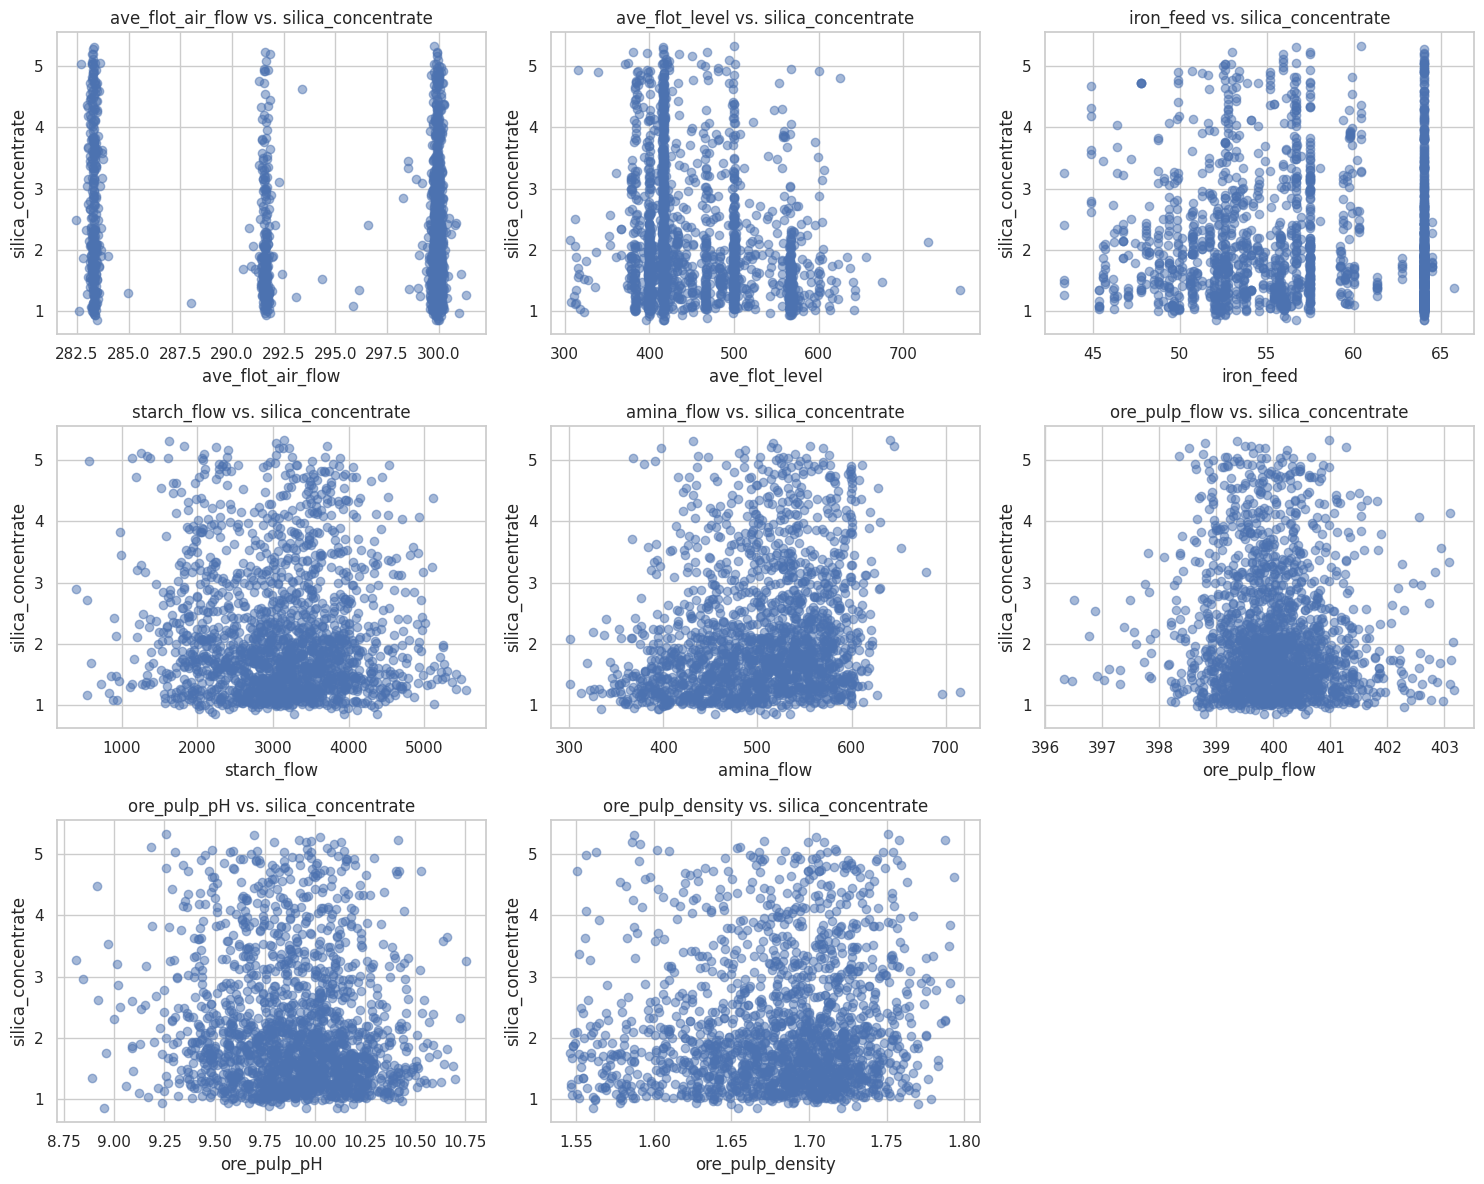

In [9]:
target = 'silica_concentrate'
input_features = [col for col in features if col != target]

plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(input_features):
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(df[col], df[target], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{col} vs. {target}")
plt.tight_layout()
plt.show()

## 10. Feature Relationships with silica_concentrate

Plot regression lines or jointplots for features most correlated with silica_concentrate.

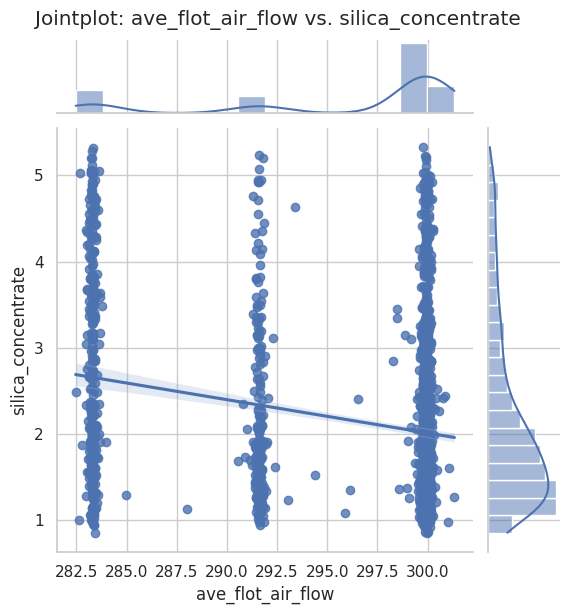

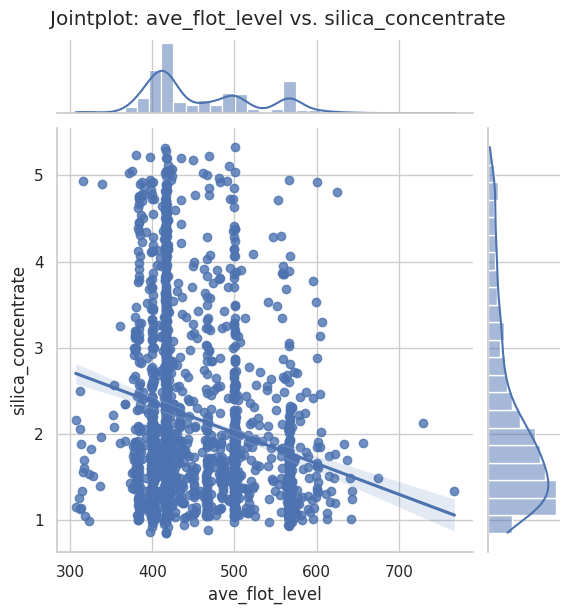

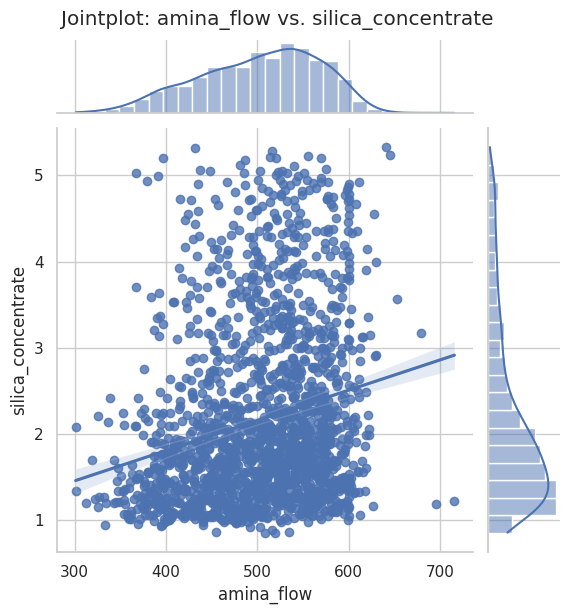

In [10]:
# Find top 3 features most correlated with silica_concentrate
corr_with_target = corr_matrix[target].drop(target).abs().sort_values(ascending=False)
top_features = corr_with_target.head(3).index.tolist()

for feat in top_features:
    sns.jointplot(x=df[feat], y=df[target], kind='reg', height=6)
    plt.suptitle(f"Jointplot: {feat} vs. {target}", y=1.02)
    plt.show()